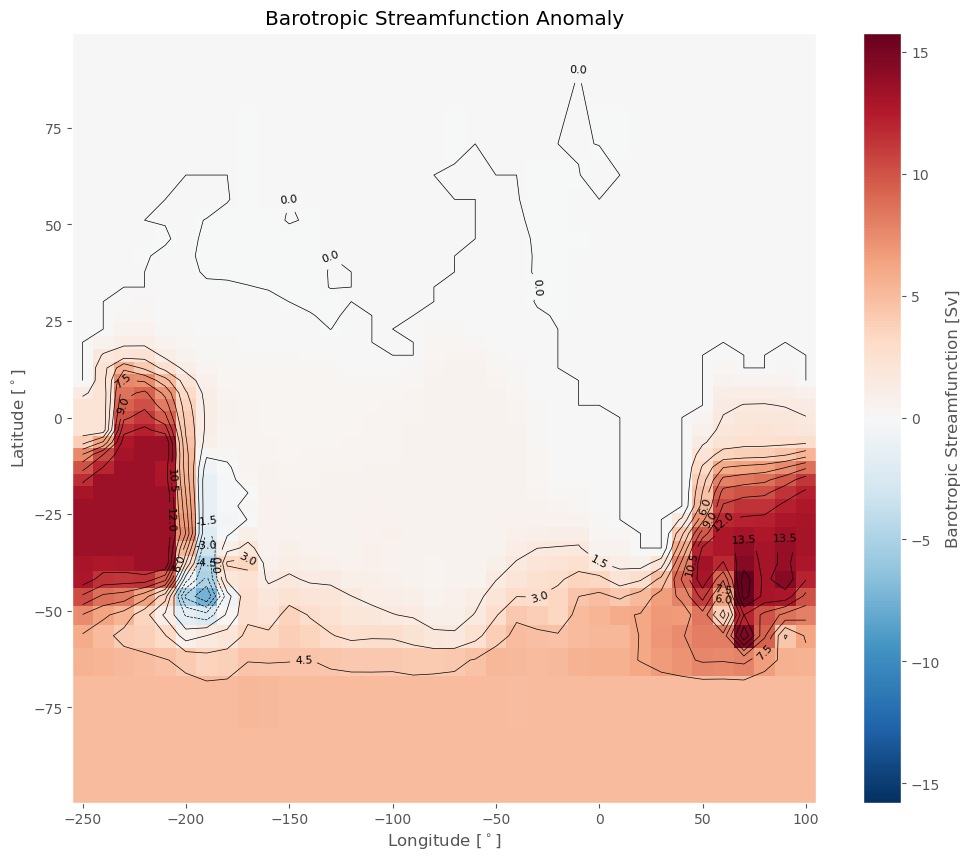

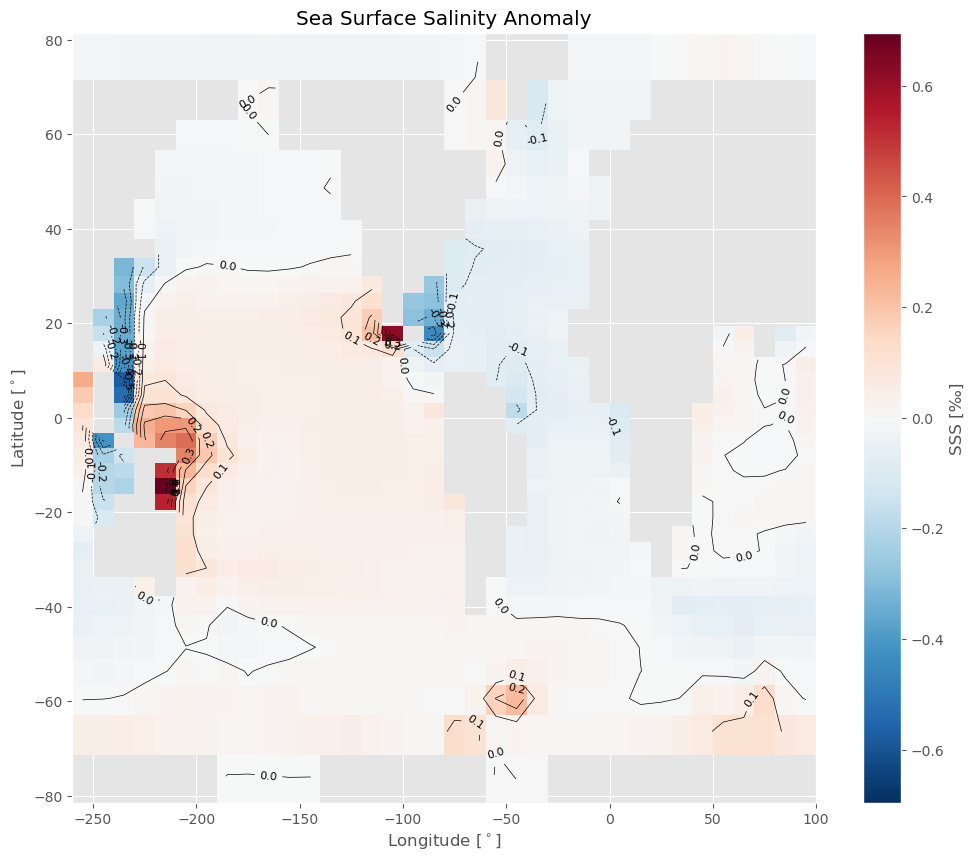

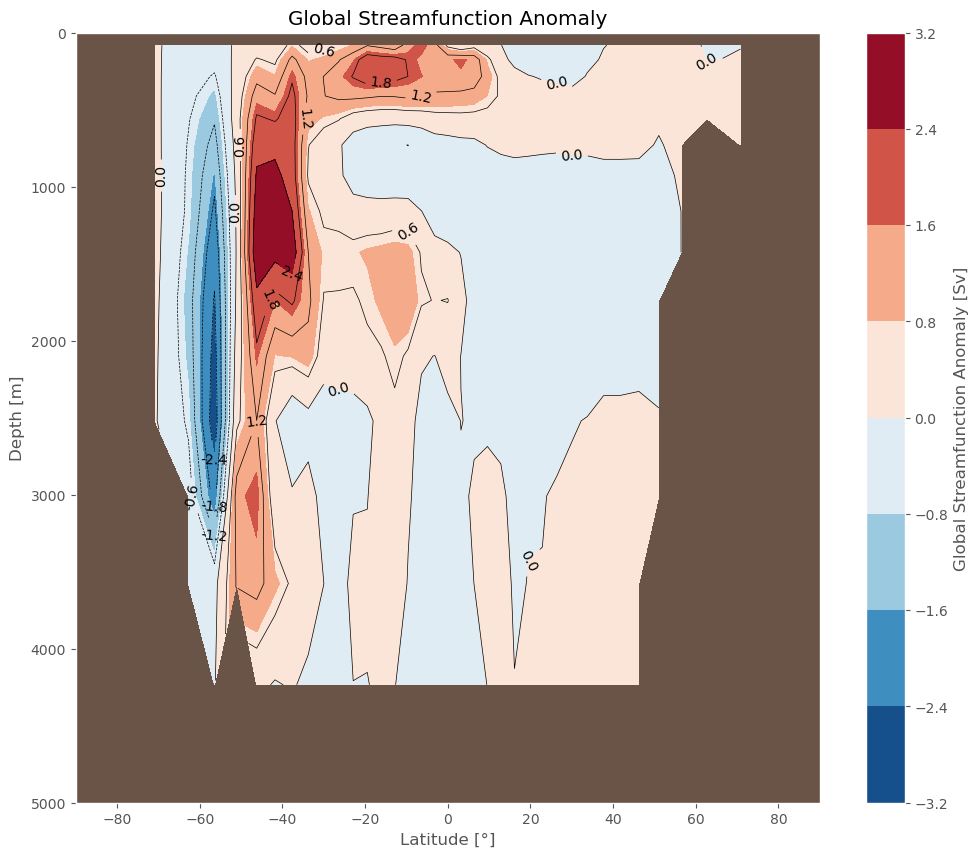

In [94]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


plt.style.use("ggplot")

# open data
open2D = xr.open_dataset("../model_outputs/open/fields_biogem_2d.nc")
open3D = xr.open_dataset("../model_outputs/open/fields_biogem_3d.nc")
closed2D = xr.open_dataset("../model_outputs/close/fields_biogem_2d.nc")
closed3D = xr.open_dataset("../model_outputs/close/fields_biogem_3d.nc")

# pick ocean properties
barot_stream_open = open2D["phys_psi"].isel(time=-1)  # Sv
barot_stream_close = closed2D["phys_psi"].isel(time=-1)  # Sv
sss_open = open2D["ocn_sur_sal"].isel(time=-1)  # per mil
sss_close = closed2D["ocn_sur_sal"].isel(time=-1)  # per mil
glob_opsi_open = open2D["phys_opsi"].isel(time=-1)  # Sv
glob_opsi_close = closed2D["phys_opsi"].isel(time=-1)  # Sv

# Calculate anomalies
barot_anom = (barot_stream_close - barot_stream_open).rename("Barotropic Streamfunction [Sv]")
sss_anom = (sss_close - sss_open).rename("SSS [‰]")
glob_opsi_anom = (glob_opsi_close - glob_opsi_open).rename("Global Streamfunction [Sv]")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
barot_anom.plot(ax=ax)
ax.set_xlabel(r"Longitude [$^\circ$]")
ax.set_ylabel(r"Latitude [$^\circ$]")
ax.set_title("Barotropic Streamfunction Anomaly")
contour = ax.contour(barot_anom["lon_psi"], barot_anom["lat_psi"], barot_anom, colors='k',
                      levels=20, linewidths=0.5)
ax.clabel(contour, inline=True, fontsize=8, colors='k', fmt='%1.1f')
plt.grid()

# Show the figure
plt.savefig("./fig1.png", dpi=300)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sss_anom.plot(ax=ax)
ax.set_xlabel(r"Longitude [$^\circ$]")
ax.set_ylabel(r"Latitude [$^\circ$]")
ax.set_title("Sea Surface Salinity Anomaly")
contour = ax.contour(sss_anom["lon"], sss_anom["lat"], sss_anom, colors='k',
                      levels=20, linewidths=0.5)
ax.clabel(contour, inline=True, fontsize=8, colors='k', fmt='%1.1f')
plt.grid()

# Show the figure
plt.savefig("./fig2.png", dpi=300)

plt.figure(figsize=(12,10))
plt.fill_between(glob_opsi_anom["lat_moc"], glob_opsi_anom["zt_moc"].min(), glob_opsi_anom["zt_moc"].max(), color='#695447')
contour_filled = plt.contourf(glob_opsi_anom["lat_moc"], glob_opsi_anom["zt_moc"], glob_opsi_anom, cmap="RdBu_r")
contour_lines = plt.contour(glob_opsi_anom["lat_moc"], glob_opsi_anom["zt_moc"], glob_opsi_anom, levels=10, colors='k', linewidths=0.5)
plt.xlabel("Latitude [°]")
plt.ylabel("Depth [m]")
cbar = plt.colorbar(contour_filled)
cbar.set_label("Global Streamfunction Anomaly [Sv]")
plt.clabel(contour_lines, inline=True, fontsize=10, fmt='%1.1f')
plt.gca().invert_yaxis()
plt.title("Global Streamfunction Anomaly")
plt.savefig("./fig3.png", dpi=300)


In [91]:
barot_open = barot_stream_open.to_numpy().flatten()
barot_open = barot_open[~np.isnan(barot_open)]

barot_close = barot_stream_close.to_numpy().flatten()
barot_close = barot_close[~np.isnan(barot_close)]

In [104]:

def ks_two_sample_test_and_plot(sample1, sample2, alpha=0.05):
    # Perform the KS two-sample test
    statistic, p_value = ks_2samp(sample1, sample2)

    # Plot the CDFs for the two samples
    sorted_sample1 = np.sort(sample1)
    sorted_sample2 = np.sort(sample2)
    cdf_sample1 = np.arange(1, len(sorted_sample1) + 1) / len(sorted_sample1)
    cdf_sample2 = np.arange(1, len(sorted_sample2) + 1) / len(sorted_sample2)

    plt.figure(figsize=(8, 6))
    plt.plot(sorted_sample1, cdf_sample1, label='Open Indonesian Archipelago ECDF', color='blue')
    plt.plot(sorted_sample2, cdf_sample2, label='Closed Indonesian Archipelago ECDF', color='red')

    # Calculate the critical value for the KS statistic
    n1 = len(sorted_sample1)
    n2 = len(sorted_sample2)
    critical_value = 1.36 * np.sqrt((n1 + n2) / (n1 * n2))

    # Get user input for the x-axis label
    custom_x_label = input("Enter a custom x-axis label: ")

    # Customize the x-axis label based on user input
    plt.xlabel(custom_x_label)

    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)

    # Add a text annotation to display the KS statistic and p-value
    plt.text(0.5, 0.1, f'KS Statistic: {statistic:.3f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, 0.05, f'p-value: {p_value:.3f}', ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

    # Interpret the results
    if statistic > critical_value:
        print("Reject the null hypothesis. The samples come from different distributions.")
    else:
        print("Fail to reject the null hypothesis. The samples may come from the same distribution.")


Enter a custom x-axis label: Barotropic Streamfunction [Sv]


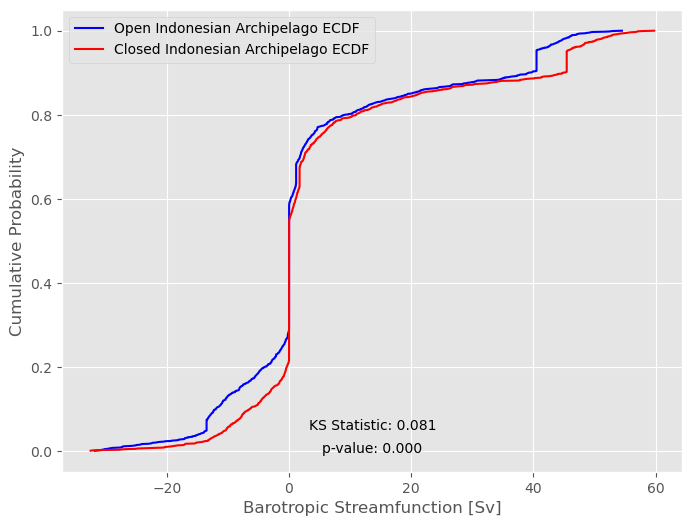

Reject the null hypothesis. The samples come from different distributions.


In [105]:
ks_two_sample_test_and_plot(barot_open, barot_close, alpha=0.01)

In [106]:
sss_open = sss_open.to_numpy().flatten()
sss_open = sss_open[~np.isnan(sss_open)]

sss_close = sss_close.to_numpy().flatten()
sss_close = sss_close[~np.isnan(sss_close)]

Enter a custom x-axis label: Sea Surface Salinity [‰]


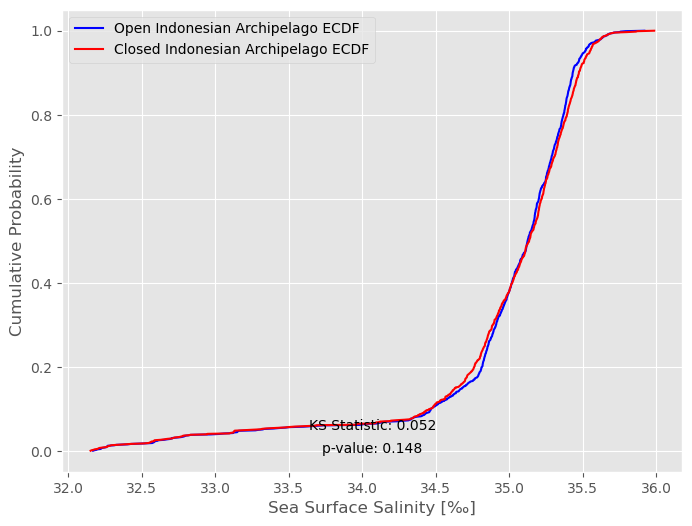

Fail to reject the null hypothesis. The samples may come from the same distribution.


In [107]:
ks_two_sample_test_and_plot(sss_open, sss_close, alpha=0.01)

In [108]:
glob_opsi_open = glob_opsi_open.to_numpy().flatten()
glob_opsi_open = glob_opsi_open[~np.isnan(glob_opsi_open)]

glob_opsi_close = glob_opsi_close.to_numpy().flatten()
glob_opsi_close = glob_opsi_close[~np.isnan(glob_opsi_close)]

Enter a custom x-axis label: Global StreamFunction [Sv]


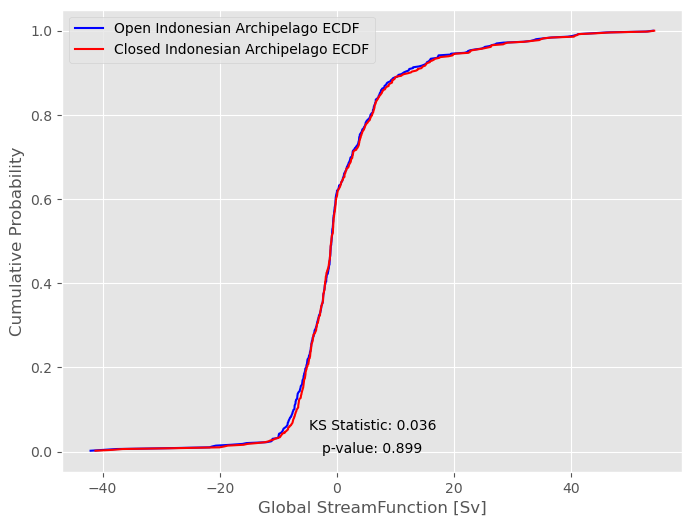

Fail to reject the null hypothesis. The samples may come from the same distribution.


In [109]:
ks_two_sample_test_and_plot(glob_opsi_open, glob_opsi_close, alpha=0.01)